In [53]:
import pandas as pd
import numpy as np
from tqdm import tqdm

import matplotlib

# for interactive plots in Jupyter:
# matplotlib.use('qtagg')

from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

from transform_filter_data import transform_filter_data

In [54]:
# history_len: 365, 270, 180, 90 days
# span_threshold: 90, 60, 40, 20 days

#   1-class_num / total

# 2022-12-31:
# 1 year:   118 / 3117
# 9 months: 118 / 3117
# 6 months: 118 / 3621
# 3 months: 118 / 3621

# TRYING the next finish_date: 2016-01-01 + 2340 days = 2022-05-29

# 2022-05-28:
# 1 year:   573 / 2108
# 9 months: 593 / 2128
# 6 months: 593 / 2632
# 3 months: 593 / 2632

# TRYING the next finish_date: 2016-01-01 + 2515 days = 2022-11-20

# 2022-11-19:
# 1 year:   392 / 2716
# 9 months: 392 / 2716
# 6 months: 392 / 3220
# 3 months: 392 / 3220

objs_df = transform_filter_data(
    source_csv = 'datasets_popularity_DAOD_PHYS_mc16_13TeV_202308141254.csv',
    finish_date = pd.Timestamp('2022-05-28'),
    horizon_date = pd.Timestamp('2022-06-04'),
    span_threshold = pd.Timedelta('90 days'),
    history_len = pd.Timedelta('365 days'),
    accesses_threshold = 30
)

filling 'y' column


100%|██████████████████████████████████| 18143/18143 [00:01<00:00, 10871.72it/s]


after filtering by access number: 593 / 2659
filtering by history presence


100%|█████████████████████████████████████| 2659/2659 [00:00<00:00, 3455.04it/s]


after filtering: 573 / 2108
transforming date arrays to timeseries


100%|██████████████████████████████████████| 2108/2108 [00:05<00:00, 362.92it/s]


In [55]:
# Custom colormap for forthcoming HeatMap
# Blue-to-Red, but with White zeros

newcolors = np.zeros((256, 4))
for i in range(newcolors.shape[0]):
    newcolors[i] = [i / 255, 0.0, (newcolors.shape[0] - i - 1) / 255, 1.0]
newcolors[0] = [1.0, 1.0, 1.0, 1.0]
newcm = ListedColormap(newcolors)

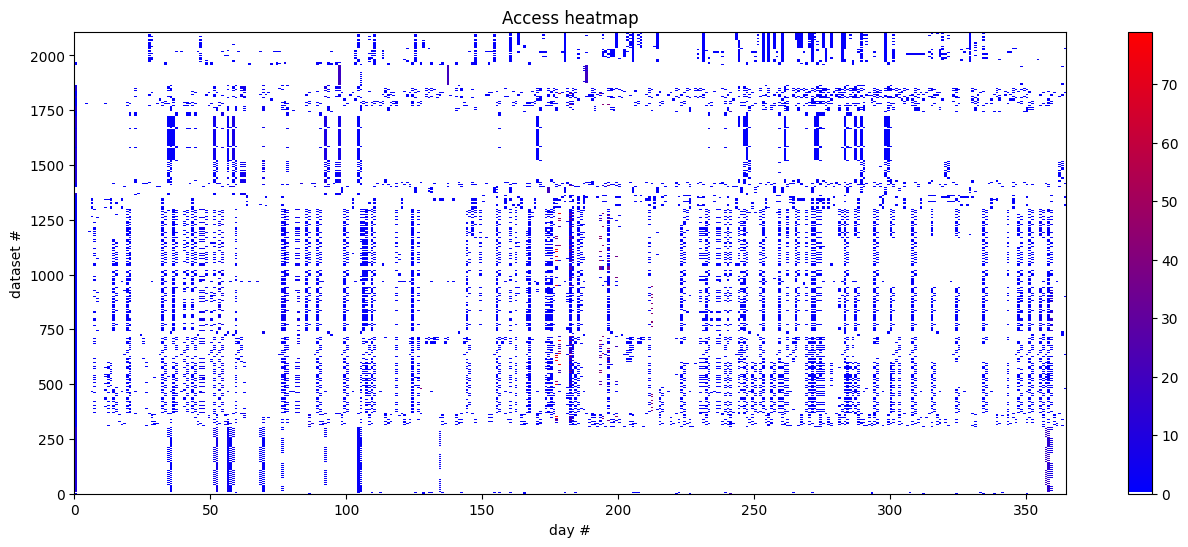

In [56]:
heat_matrix = np.stack(objs_df['history_ts'].to_numpy())

fig, ax = plt.subplots()
fig.set(figwidth=16, figheight=6)
ax.set(xlabel='day #', ylabel='dataset #',
       title='Access heatmap')


psm = ax.pcolormesh(heat_matrix, cmap=newcm, rasterized=True)
fig.colorbar(psm, ax=ax)

# plt.show() # for interactive backend

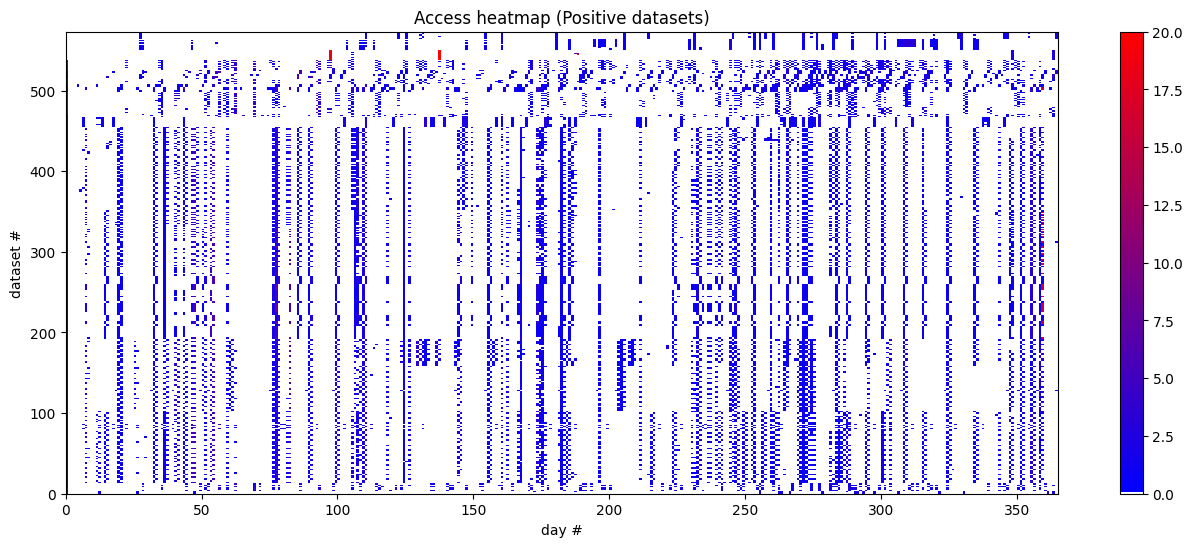

In [57]:
heat_matrix = np.stack(objs_df[objs_df['y'] > 0]['history_ts'].to_numpy())

fig, ax = plt.subplots()
fig.set(figwidth=16, figheight=6)
ax.set(xlabel='day #', ylabel='dataset #',
       title='Access heatmap (Positive datasets)')


psm = ax.pcolormesh(heat_matrix, cmap=newcm, rasterized=True)
fig.colorbar(psm, ax=ax)

# plt.show() # for interactive backend

# fig.savefig('img/positive-datasets-histories-1.pdf', bbox_inches='tight')

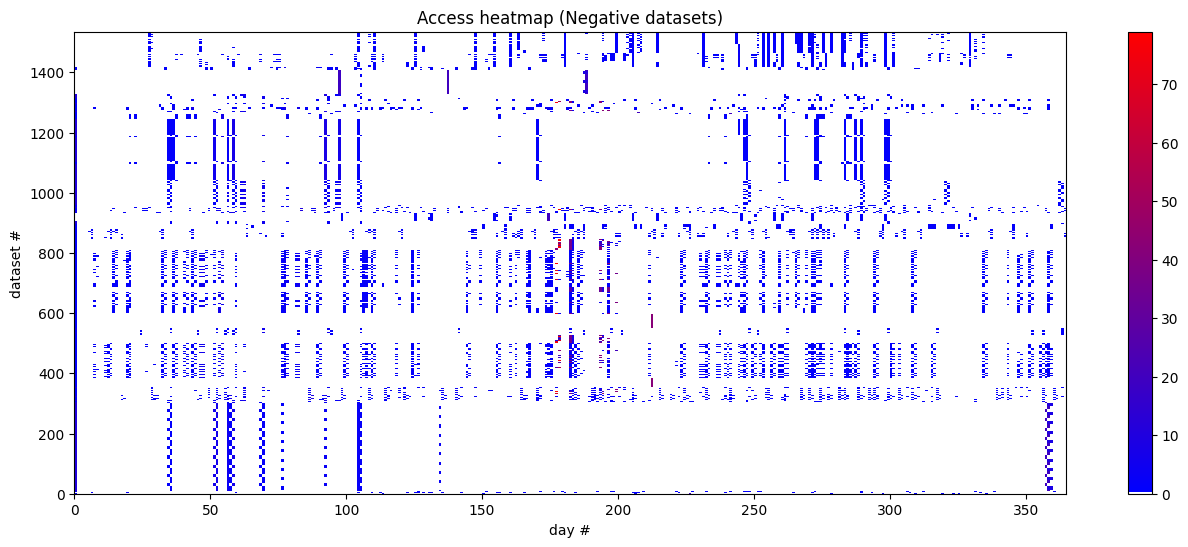

In [58]:
heat_matrix = np.stack(objs_df[objs_df['y'] == 0]['history_ts'].to_numpy())

fig, ax = plt.subplots()
fig.set(figwidth=16, figheight=6)
ax.set(xlabel='day #', ylabel='dataset #',
       title='Access heatmap (Negative datasets)')


psm = ax.pcolormesh(heat_matrix, cmap=newcm, rasterized=True)
fig.colorbar(psm, ax=ax)

# plt.show() # for interactive backend